In [3]:
# importing libraries and set standards
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statistics as stat

plt.rcParams['figure.figsize'] = 21, 15
plt.rcParams['xtick.labelsize']=55
plt.rcParams['ytick.labelsize']=55
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

282
279


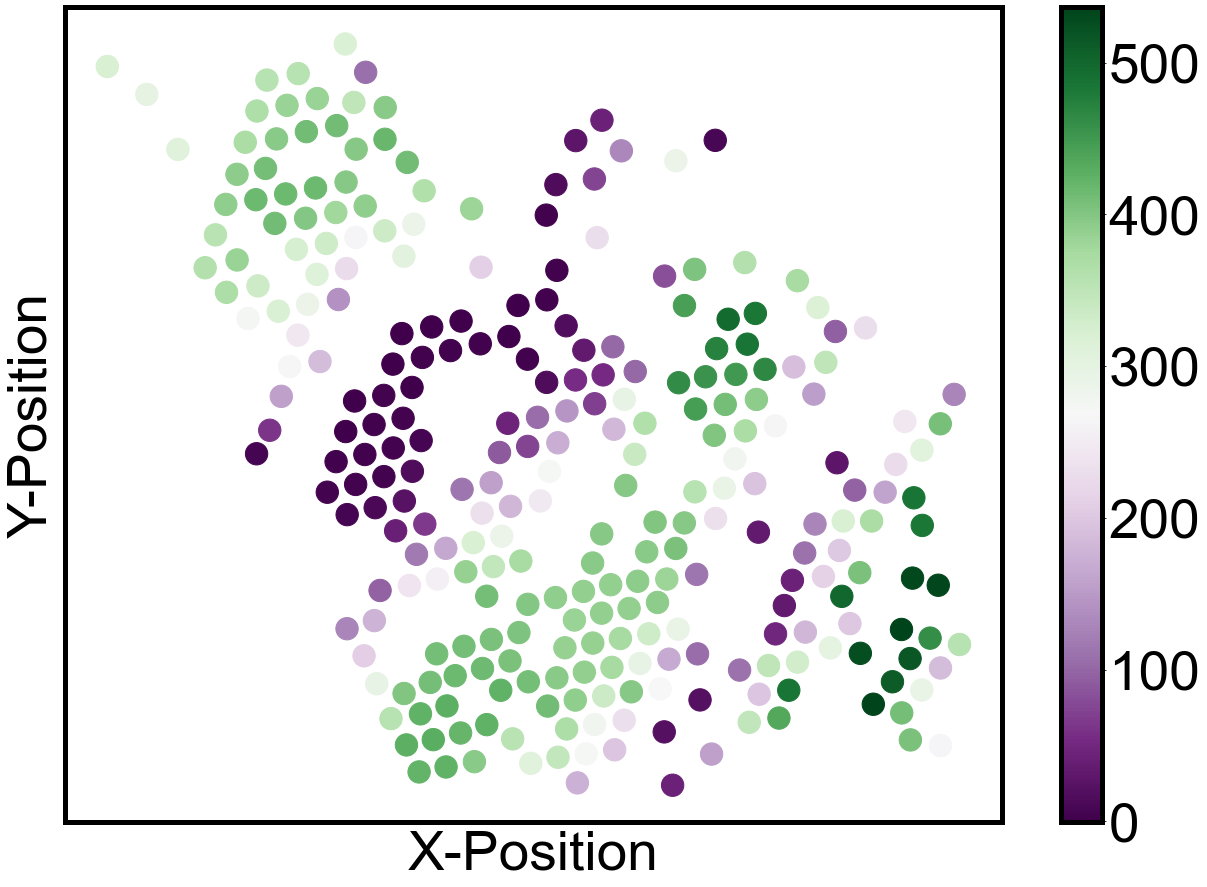

In [4]:
X = []
Y= []
GFP =[]
RFP = []
slopes = []


with open("X.txt", "r") as file:
    for line in file:
        X.append(float(line.rstrip()))
        
with open("Y.txt", "r") as file:
    for line in file:
        Y.append(float(line.rstrip()))
        
with open("GFP.txt", "r") as file:
    for line in file:
        GFP.append(float(line.rstrip()))
        
        
with open("slopes.txt", "r") as file:
    for line in file:
        slopes.append(float(line.rstrip()))   
Y = [max(Y)-item for item in Y]


slopes = [item*1000 for item in slopes]
data = {'X': X, 'Y': Y, 'GFP': GFP, 'slopes': slopes}
dataframe = pd.DataFrame(data)
print(len(dataframe))
data_new = dataframe
data_new = dataframe.drop(dataframe[dataframe['slopes'] <= 0].index)
#data_new = data_new.drop(data_new[data_new['slopes'] >= 500].index)
data_new = data_new.drop(data_new[data_new['X'] <= 0.01*max(X)].index)
data_new = data_new.drop(data_new[data_new['X'] >= 0.99*max(X)].index)
data_new = data_new.drop(data_new[data_new['Y'] <= 0.01*max(Y)].index)
data_new = data_new.drop(data_new[data_new['Y'] >= 0.99*max(Y)].index)

#plt.scatter(data_new['X']/1000, data_new['Y']/1000, c=data_new['slopes'], s=500, cmap='seismic')
plt.scatter(data_new['X']/1000, data_new['Y']/1000, c=data_new['GFP'], s=500, cmap='PRGn')

print(len(data_new['X']))

# # Add color bar to show GFP values
plt.colorbar()


plt.xlabel('X-Position', fontsize=55)
plt.ylabel('Y-Position', fontsize=55)
#plt.tick_params(axis='both', length=15, width=5)
#plt.axis([-0.05,2.7, -0.05, 2.1])
plt.xticks([])
plt.yticks([])
#plt.savefig("X-Y-Slope.svg",dpi=100, format='svg')   
plt.savefig("X-Y-GFP.svg",dpi=100, format='svg')